In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df.drop(columns=['Cabin'],inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)

In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)

In [13]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [15]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


<ipython-input-22-fa4243e939cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex',y='Survived',data=df,palette="magma")


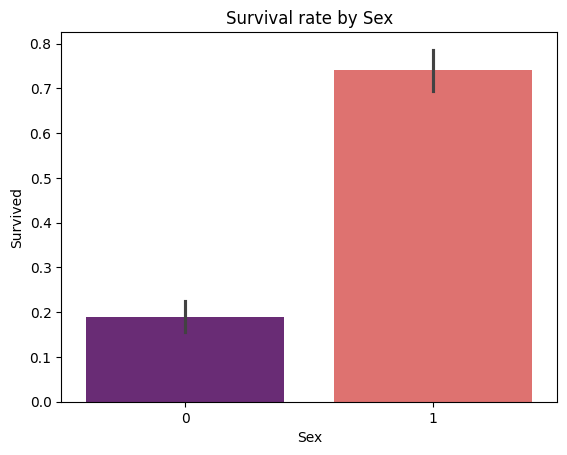

In [22]:
import seaborn as sns

sns.barplot(x='Sex',y='Survived',data=df,palette="magma")
plt.title("Survival rate by Sex")
plt.show()

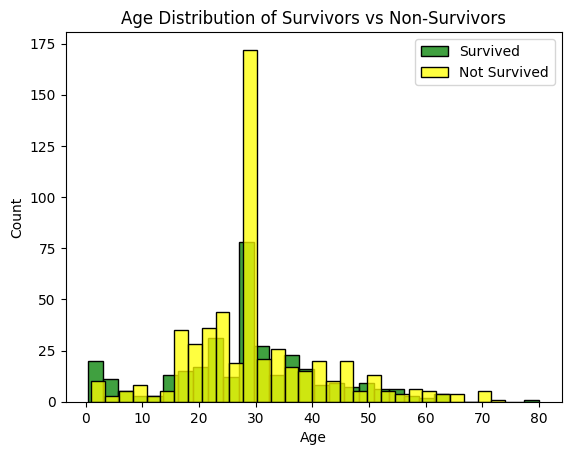

In [26]:
sns.histplot(df[df['Survived']==1]['Age'],label='Survived',bins=30,kde=False,color='green')
sns.histplot(df[df['Survived']==0]['Age'],label='Not Survived',bins=30,kde=False,color='yellow')
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

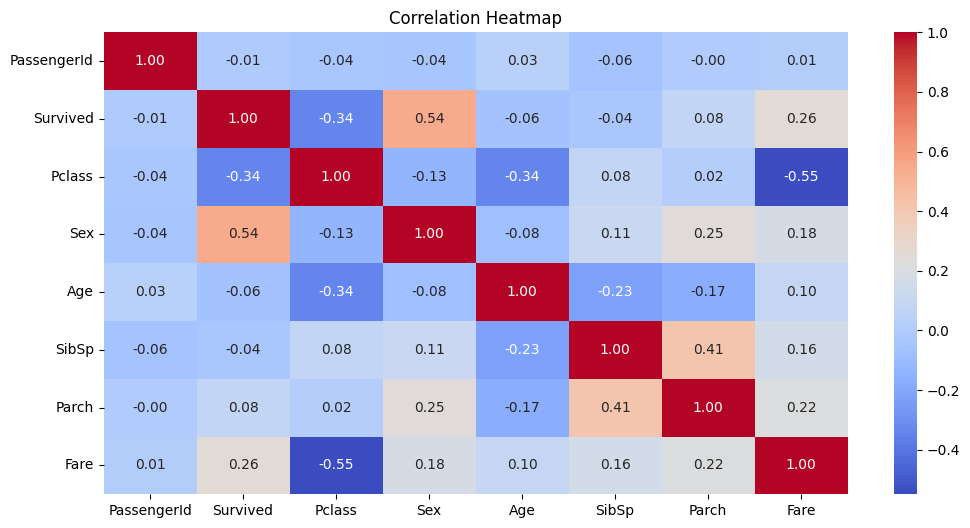

In [36]:
plt.figure(figsize=(12, 6))
numerical_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

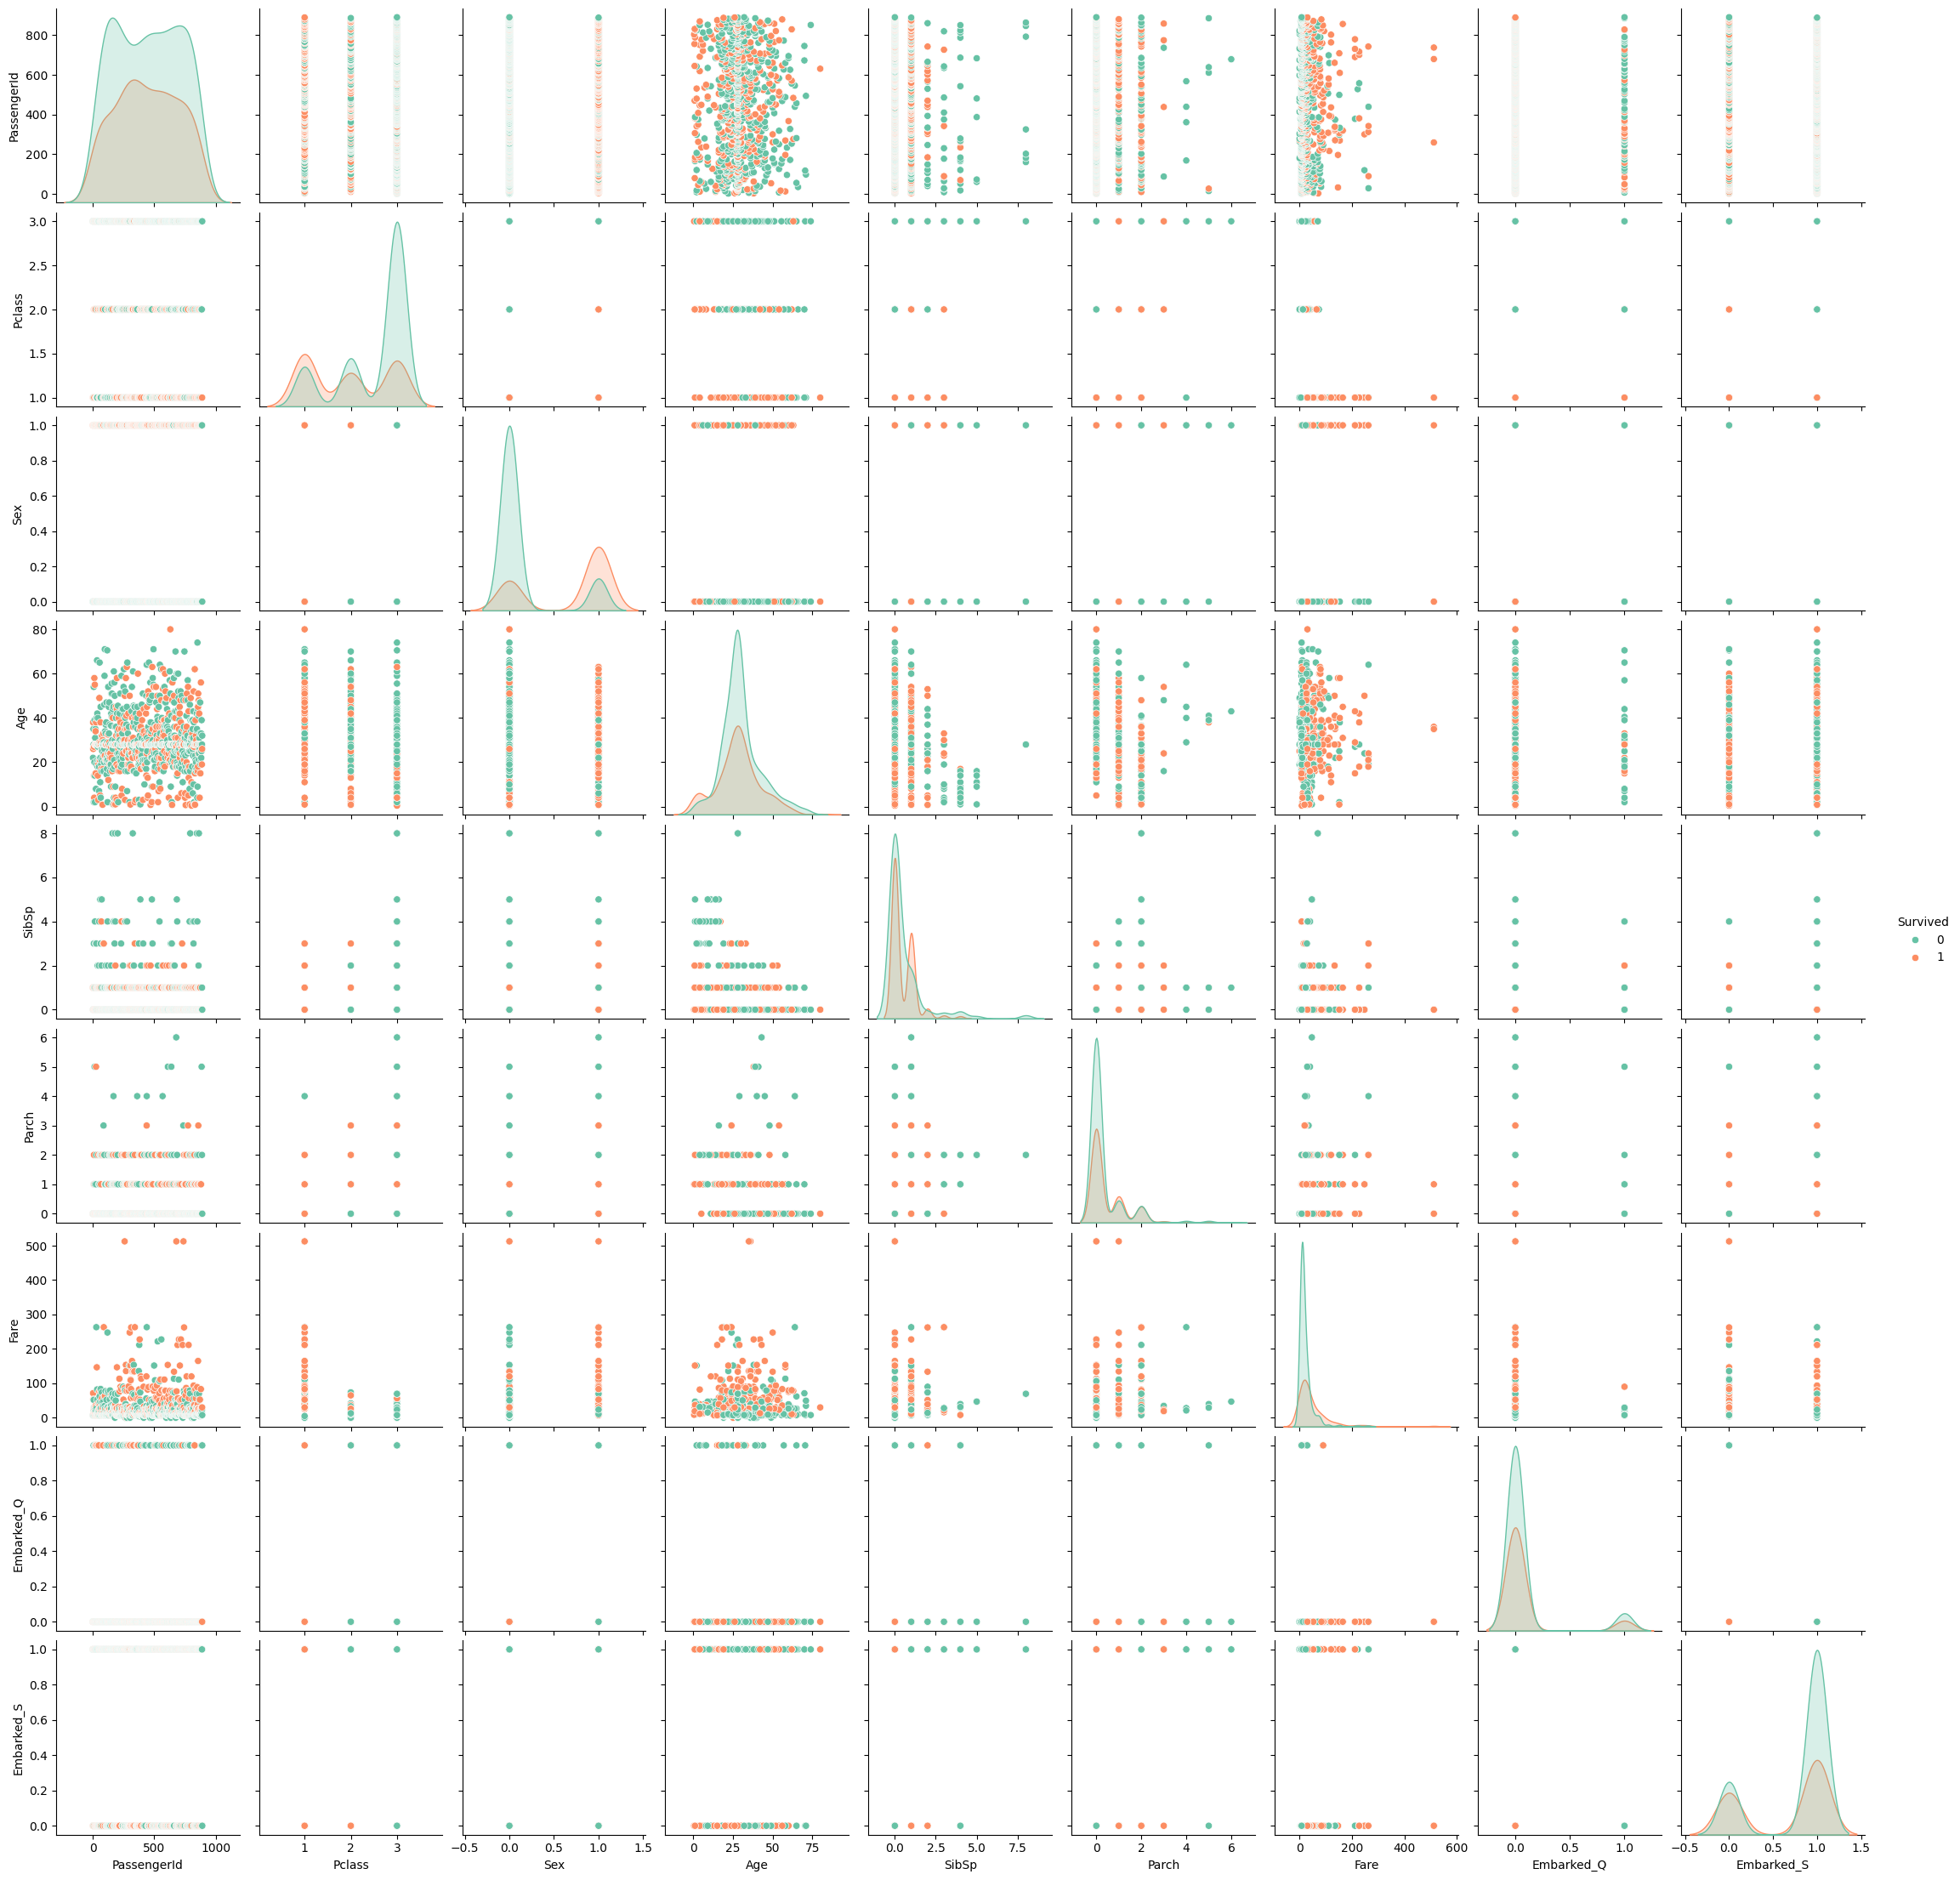

In [37]:
sns.pairplot(df, hue="Survived", diag_kind="kde", palette="Set2")
plt.show()

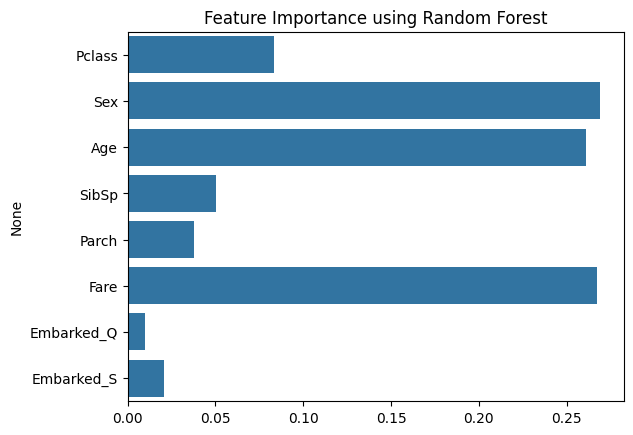

In [39]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = df['Survived']

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

importances = clf.feature_importances_
feature_names = X.columns

sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance using Random Forest')
plt.show()
